# Openclassrooms PJ7 : implement automatic image indexing

## Specific installs / import in online notebook

In [1]:
!pip install opencv-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 299 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.4.0.42
    Uninstalling opencv-python-4.4.0.42:
      Successfully uninstalled opencv-python-4.4.0.42
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

albumentations 0.4.6 requires opencv-python>=4.1.1, but you'll have opencv-python 3.4.2.17 which is incompatible.


In [2]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 10.6 MB/s 


In [3]:
!ls ../usr/lib/functions_py

__output__.json   __script__.ipynb  custom.css
__results__.html  __script__.py     functions_py.py


In [4]:
!ls

__notebook__.ipynb


In [5]:
%matplotlib inline

#%load_ext autoreload  # Autoreload has a bug : when you modify function in source code and run again, python kernel hangs :(
#%autoreload 2

import datetime as dt

import sys, importlib

from functions_py import * # MODIFIED for kaggle (replaced by functions_py instead of functions)
importlib.reload(sys.modules['functions_py']) # MODIFIED for kaggle

import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import datetime as dt

import os
import zipfile
import urllib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np   
  
import plotly as py
import plotly.graph_objects as go
import ipywidgets as widgets

import qgrid

import glob

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import GridSearchCV

from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import entropy

from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import Perceptron
from sklearn import tree

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

#from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_auc_score

import nltk
import codecs

from sklearn.decomposition import LatentDirichletAllocation

#from nltk.corpus.reader.api import CorpusReader
#from nltk.corpus.reader.api import CategorizedCorpusReader

from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

#import pandas_profiling

from bs4 import BeautifulSoup

DATA_PATH = os.path.join("../input", "stanford-dogs-dataset", "images") # Modified for kaggle
DATA_PATH = os.path.join(DATA_PATH, "Images")

#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults_20190101-20200620.csv")
#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults 20200301-20200620_1.csv")

DATA_PATH_FILE = os.path.join(DATA_PATH, "*.csv")
ALL_FILES_LIST = glob.glob(DATA_PATH_FILE)

ALL_FEATURES = []

plt.rcParams["figure.figsize"] = [16,9] # Taille par défaut des figures de matplotlib

import seaborn as sns
from seaborn import boxplot
sns.set()

#import common_functions

####### Paramètres pour sauver et restaurer les modèles :
import pickle
####### Paramètres à changer par l'utilisateur selon son besoin :

'''
RECOMPUTE_GRIDSEARCH = True  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = False # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX
                          # Grid search results are loaded with full samples (SAMPLED_DATA must be False)
'''


RECOMPUTE_GRIDSEARCH = False  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = True # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX

#GRIDSEARCH_CSV_FILE = 'grid_search_results.csv'

GRIDSEARCH_FILE_PREFIX = 'grid_search_results_'

# Set this to load (or train again / save) Clustering model to disk
SAVE_CLUSTERING_MODEL = True
CLUSTERING_FILE_MODEL_PREFIX = 'clustering_model'

SAVE_DESCRIPTORS = True
DESCRIPTORS_FILE_PREFIX = 'descriptors_file'


SAVE_BESTGRIDSEARCH_MODEL = False
LOAD_BESTGRIDSEARCH_MODEL = True
BESTGRIDSEARCH_FILE_MODEL_PREFIX = 'bestgridsearch_model_'

EXECUTE_INTERMEDIATE_MODELS = True # If True: every intermediate model (which results are manually analyzed in the notebook) will be executed


# Necessary for predictors used in the notebook :
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures

### For progress bar :
#from tqdm import tqdm_notebook as tqdm  #Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
from tqdm.notebook import tqdm

# Statsmodel : 
import statsmodels.formula.api as smf

import statsmodels.api as sm
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from nltk.cluster import KMeansClusterer # NLTK algorithm will be useful for cosine distance

SAVE_API_MODEL = True # If True : API model ill be saved
API_MODEL_PICKLE_FILE = 'API_model_PJ7.pickle'


LEARNING_CURVE_STEP_SIZE = 100


# Image settings

In [6]:
from PIL import Image
from io import BytesIO

In [7]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()

# Exploration of 1 image from OC course

In [8]:
!ls ../

input  lib  src  usr  working


In [9]:
img = Image.open("../input/stanford-dogs-dataset/images/Images/n02099601-golden_retriever/n02099601_1010.jpg") 

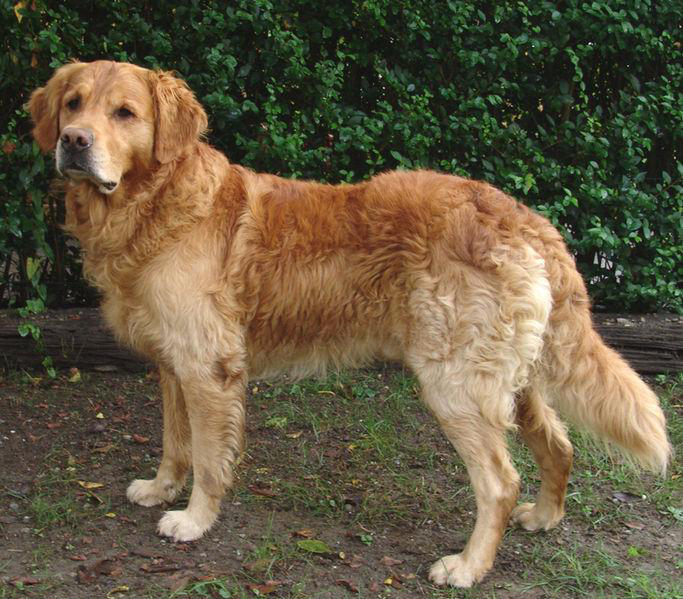

In [10]:
display(img)

In [11]:
np_img = np.array(img)

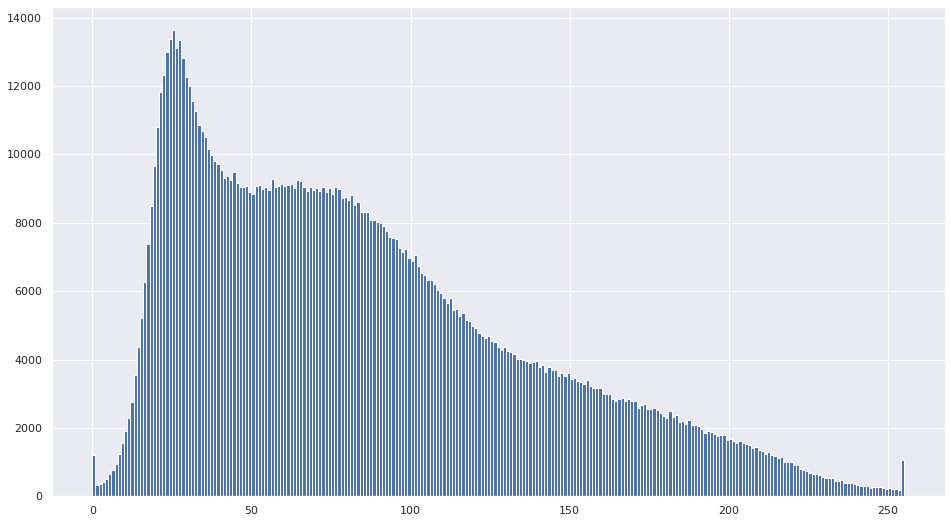

In [12]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256))
plt.show()

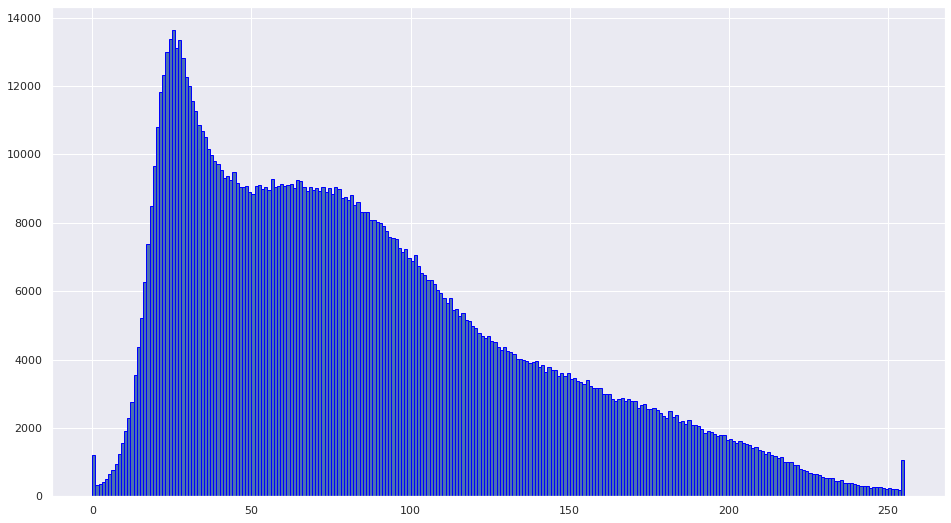

In [13]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256), edgecolor='blue')
plt.show()

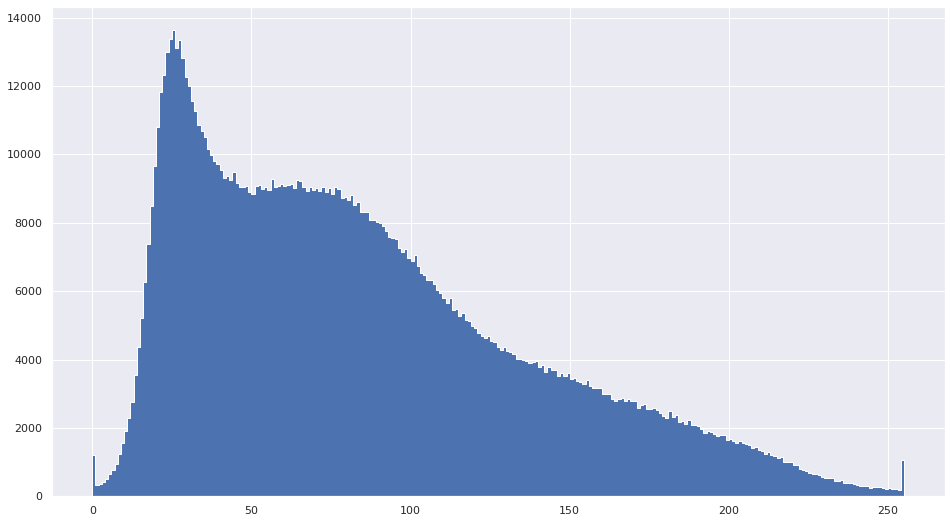

In [14]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256), histtype='stepfilled')
plt.show()

# Exploration of 1 image

In [15]:
PATH_TESTIMAGE = DATA_PATH + "/n02111889-Samoyed/" + "n02111889_1363.jpg"
img = Image.open(PATH_TESTIMAGE) 

In [16]:
'n02108422-bull_mastiff'.split('-')[1]

'bull_mastiff'

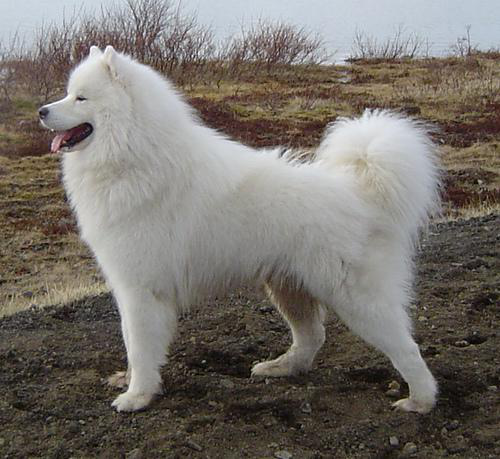

In [17]:
display(img)

In [18]:
img.size

(500, 459)

In [19]:
img.mode

'RGB'

In [20]:
img.getpixel((20, 100))

(101, 95, 69)

In [21]:
np_image = np.array(img)

In [22]:
np_image.shape

(459, 500, 3)

In [23]:
np.array([1,2,3])

array([1, 2, 3])

In [24]:
np_img = np.array(img)

In [25]:
np_img[:, :, 0]

array([[205, 205, 205, ..., 189, 189, 189],
       [204, 204, 204, ..., 188, 188, 188],
       [203, 203, 203, ..., 188, 188, 188],
       ...,
       [ 49,  72,  74, ...,  63,  68,  78],
       [ 36,  62,  73, ...,  63,  65,  72],
       [ 51,  63,  65, ...,  62,  62,  64]], dtype=uint8)

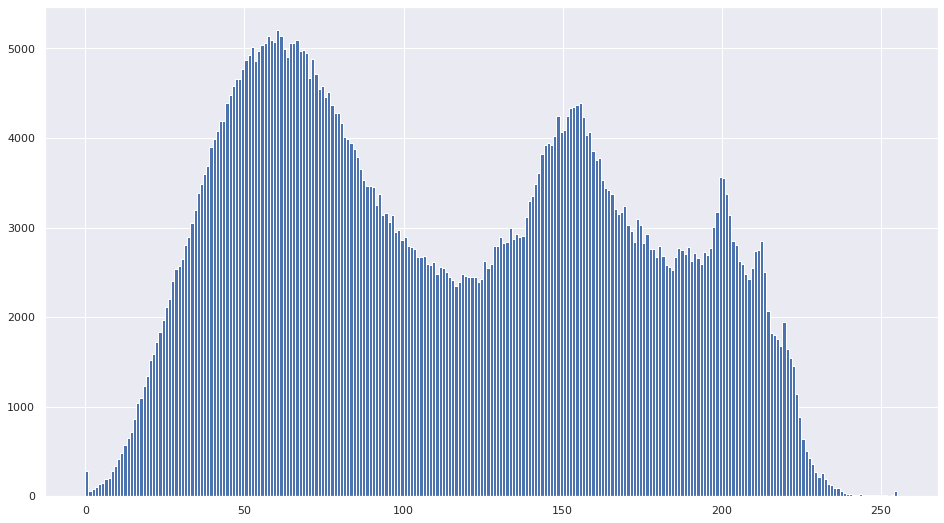

In [26]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256))
plt.show()

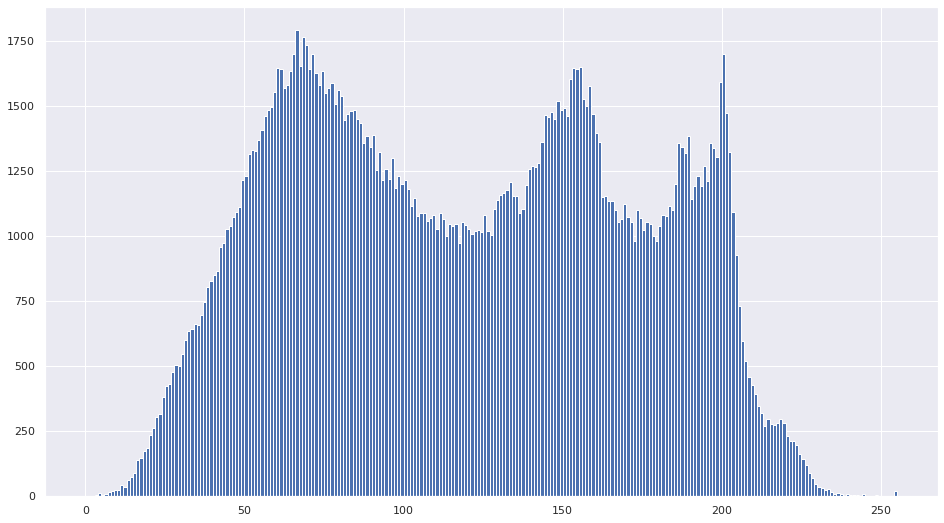

In [27]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img[:, :, 0].flatten(), bins=range(256))
plt.show()

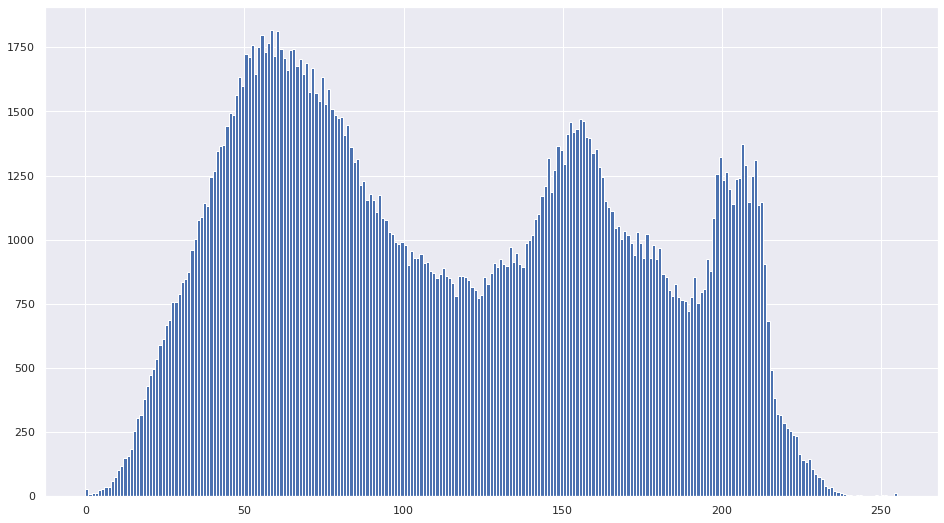

In [28]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img[:, :, 1].flatten(), bins=range(256))
plt.show()

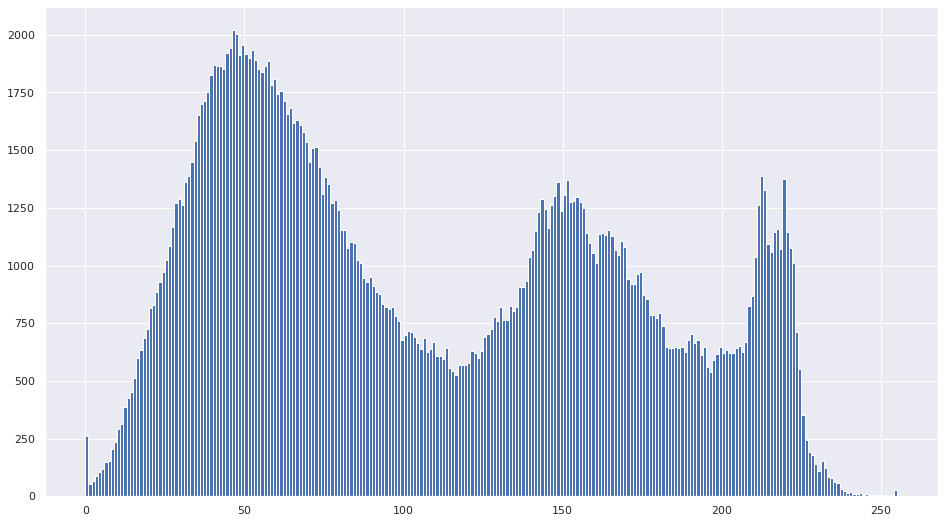

In [29]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img[:, :, 2].flatten(), bins=range(256))
plt.show()

# Image preprocessing tests

In [30]:
imgcv = cv2.imread(PATH_TESTIMAGE)

In [31]:
imgcv_gray = cv2.cvtColor(imgcv,cv2.COLOR_BGR2GRAY) # Gray scaling

In [32]:
imgcv_gray.shape

(459, 500)

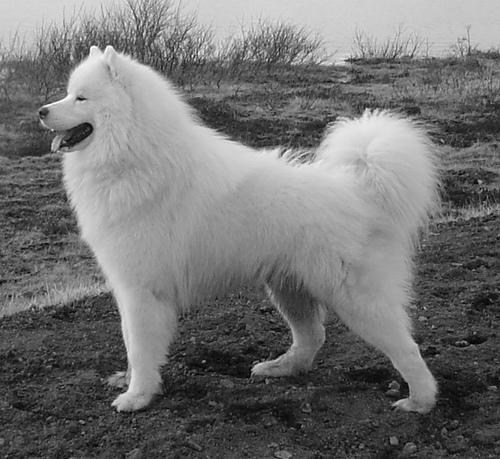

In [33]:
Image.fromarray(imgcv_gray)

In [34]:
kp = sift.detect(imgcv_gray,None)

imgcv_keypoints = cv2.drawKeypoints(imgcv_gray, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, outImage=None)

cv2.imwrite('sift_keypoints.jpg',imgcv_keypoints)


True

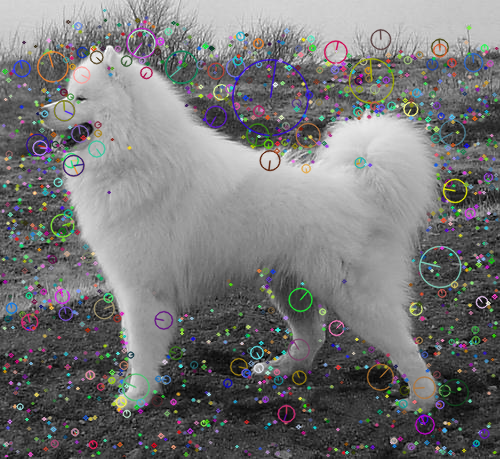

In [35]:
Image.fromarray(imgcv_keypoints)

In [36]:
kp, des = sift.detectAndCompute(imgcv_gray,None)

In [37]:
len(kp)

1660

In [38]:
des.shape

(1660, 128)

In [39]:
kp_sorted = sorted(kp, key=lambda k : k.response, reverse=True)

In [40]:
imgcv_keypoints_best = cv2.drawKeypoints(imgcv_gray, kp_sorted[0:300], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, outImage=None)

cv2.imwrite('sift_keypoints_best.jpg',imgcv_keypoints_best)

True

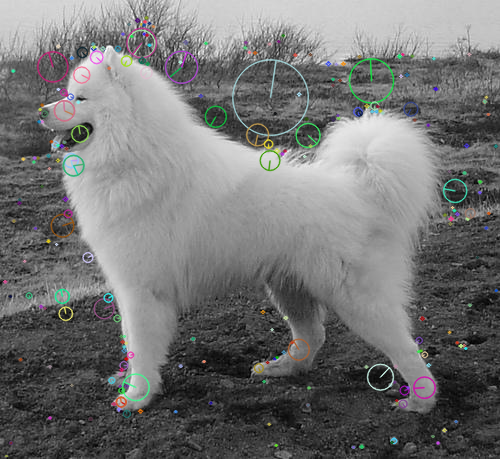

In [41]:
Image.fromarray(imgcv_keypoints_best)

In [42]:
kp_sorted[0:20]

[<KeyPoint 0x7f52cb255180>,
 <KeyPoint 0x7f52cb251b70>,
 <KeyPoint 0x7f52cb2538a0>,
 <KeyPoint 0x7f52cb2538d0>,
 <KeyPoint 0x7f52cb257c00>,
 <KeyPoint 0x7f52cb25f9f0>,
 <KeyPoint 0x7f52cb252fc0>,
 <KeyPoint 0x7f52cb253030>,
 <KeyPoint 0x7f52cb256ab0>,
 <KeyPoint 0x7f52cb24d750>,
 <KeyPoint 0x7f52cb2522a0>,
 <KeyPoint 0x7f52cb252ba0>,
 <KeyPoint 0x7f52cb252bd0>,
 <KeyPoint 0x7f52cb25a9f0>,
 <KeyPoint 0x7f52cb25aa20>,
 <KeyPoint 0x7f52cb2535a0>,
 <KeyPoint 0x7f52cb2522d0>,
 <KeyPoint 0x7f52cb2515d0>,
 <KeyPoint 0x7f52cb251600>,
 <KeyPoint 0x7f52cb2573c0>]

In [43]:
kp[548]

<KeyPoint 0x7f52cb2538a0>

In [44]:
kp_sorted_indices = [i[0] for i in sorted(enumerate(kp), key=lambda x:x[1].response, reverse=True)]

In [45]:
kp_sorted_indices

[678,
 395,
 548,
 549,
 902,
 1563,
 502,
 503,
 811,
 37,
 432,
 480,
 481,
 1143,
 1144,
 532,
 433,
 365,
 366,
 858,
 205,
 500,
 323,
 324,
 542,
 543,
 1204,
 457,
 458,
 973,
 306,
 523,
 1281,
 284,
 1242,
 507,
 711,
 414,
 893,
 402,
 1056,
 199,
 494,
 495,
 223,
 565,
 566,
 809,
 439,
 1218,
 1186,
 1187,
 980,
 398,
 1225,
 1149,
 515,
 1267,
 19,
 1450,
 626,
 627,
 958,
 1246,
 271,
 1613,
 794,
 1315,
 461,
 361,
 362,
 971,
 972,
 1588,
 88,
 318,
 319,
 373,
 374,
 873,
 868,
 470,
 1195,
 1196,
 521,
 899,
 430,
 426,
 427,
 1258,
 392,
 773,
 506,
 550,
 551,
 875,
 547,
 202,
 504,
 554,
 555,
 262,
 1256,
 897,
 898,
 1105,
 610,
 611,
 1233,
 1282,
 857,
 1307,
 1308,
 1309,
 1141,
 291,
 1111,
 337,
 360,
 559,
 560,
 561,
 499,
 530,
 1091,
 1092,
 1093,
 336,
 1217,
 931,
 295,
 296,
 1650,
 1651,
 330,
 1547,
 1082,
 1439,
 519,
 612,
 613,
 969,
 1036,
 489,
 1122,
 1123,
 476,
 1202,
 1199,
 197,
 984,
 1231,
 101,
 780,
 525,
 526,
 261,
 1134,
 597,
 15

In [46]:
des[kp_sorted_indices[0:20], :].shape

(20, 128)

In [47]:
flann_params = dict(algorithm = 1, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {}) 
bow_extract = cv2.BOWImgDescriptorExtractor( sift , matcher )
#bow_extract.setVocabulary( vocab ) # the 64x20 dictionary, you made before # <= selon la doc:  Each row of the vocabulary is a visual word (cluster center). 

In [48]:
#bowsig = bow_extract.compute(imgcv_gray, kp)

# Load images and labels

## With Pandas

In [49]:
#from functions_py import *
#importlib.reload(sys.modules['functions_py'])

In [50]:
filename_images = []
np_images = []
labels = []

deslist = []

NB_CLASSES = 20
NB_DOGS_PER_RACE = 100 # 100. Note: we have 120 dog races in the dataset
NB_KEYPOINTS_PER_DOG = 200 # 200
NB_CLUSTERS = 1000 # 100
i = 0

df_des = pd.DataFrame(np.empty((0, 1+128), np.uint8), columns=['picnum'] +  [colname for colname in range(0,128)])  # We add 1 column to store the image number

In [51]:
df_des

,picnum,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127


In [52]:
%%time

if (SAVE_CLUSTERING_MODEL == True):  # If False, we'll load data later via pickle
    cnt_files = sum([len(files) for r, d, files in os.walk(DATA_PATH)])
    progbar = tqdm(range(cnt_files))

    cnt_classes = 0
    pic_number = 0
    for root, dirs, files in os.walk(DATA_PATH):
        path = root.split(os.sep)

        cnt_classes += 1
                
        if (cnt_classes <= NB_CLASSES + 1): # NB_CLASSES + 1 because first path is Image directory root, does not count as a class
            i = 0    
            for file in files:
                if (i > NB_DOGS_PER_RACE - 1):
                    break

                #print(f'pic number: {pic_number}, dog number in current race: {i}')
                #print(f'path: {path}')

                #Uncomment those 2 lignes to filter specific races (will reduce the number of classes)
                #image_label = os.path.join(root, file).split('/')[5].split('-')[1]
                #if ((image_label == 'Pomeranian') or (image_label == 'Samoyed')):

                # Append filename to global list
                filename_images.append(os.path.join(root, file))

                img = cv2.imread(os.path.join(root, file))

                kp, des = sift.detectAndCompute(img, None)

                kp_sorted_indices = [i[0] for i in sorted(enumerate(kp), key=lambda x:x[1].response, reverse=True)] # Sort by pixel importance descending
                des = des[kp_sorted_indices[0:NB_KEYPOINTS_PER_DOG], :]

                df_picnum = pd.DataFrame(np.full((des.shape[0], 1), pic_number, dtype=np.uint16), columns=['picnum']) # Add 1 column to store picture number
                #print(des.shape)
                #print(df_picnum.shape)

                df_des_1pic = pd.concat([df_picnum, pd.DataFrame(des.astype(np.uint8))], axis=1)
                #print(df_des_1pic.shape)
                #print(df_des_1pic.columns)

                #print('df_des.shape avant concat ')
                #print(df_des.shape)

                df_des = pd.concat([df_des, df_des_1pic], axis=0)

                #print('df_des.shape apres concat ')
                #print(df_des.shape)
                #print('!')

                progbar.update(1)

                i += 1
                pic_number += 1
          

CPU times: user 7min 13s, sys: 25.7 s, total: 7min 39s
Wall time: 3min 2s


In [53]:
df_des

,picnum,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0,25,60,121,53,17,9,0,0,3,10,80,89,70,13,2,2,1,1,2,21,98,44,5,2,0,2,7,9,52,55,20,2,31,43,121,84,12,6,2,3,121,69,108,27,2,4,14,71,21,8,7,25,103,79,39,44,2,0,0,2,42,37,69,70,39,6,6,12,18,91,26,14,121,121,28,7,1,4,9,29,38,48,48,67,46,8,4,33,32,8,4,11,15,5,14,73,2,1,0,0,0,111,70,3,45,28,2,0,0,14,101,61,40,11,3,1,0,0,19,72,13,6,1,1,1,2,7,38
1,0,22,32,11,5,25,30,16,6,36,123,23,2,3,13,13,8,26,105,7,0,3,45,61,13,16,13,8,14,35,15,41,15,8,2,1,1,18,81,81,18,28,73,24,14,41,90,62,17,123,123,25,7,14,7,7,27,39,17,10,21,123,26,2,2,45,59,39,1,2,28,35,25,12,40,26,3,27,123,98,25,110,19,26,14,24,43,82,93,15,17,94,32,39,14,0,1,7,53,99,24,7,2,3,6,78,123,60,9,2,12,17,19,13,25,43,37,49,40,21,4,3,12,33,12,24,67,15,0
2,0,48,2,0,1,3,14,16,71,16,2,3,7,16,96,30,33,50,15,5,6,15,34,29,58,5,3,19,44,36,52,51,21,19,8,3,42,24,6,21,115,9,19,63,121,71,31,11,20,119,121,63,35,30,10,5,21,17,10,16,61,121,81,4,1,35,63,16,35,83,4,1,8,17,13,14,89,121,36,11,18,121,91,18,11,10,9,7,44,27,21,16,33,80,71,2,1,64,61,8,13,64,3,0,0,10,14,9,36,121,23,4,8,78,69,13,5,4,3,3,24,10,18,19,36,17,3,0,1
3,0,0,0,0,0,0,0,0,0,3,9,5,0,0,0,0,0,34,15,3,0,1,4,25,50,6,9,4,3,19,23,59,41,0,0,0,2,28,14,0,0,37,72,72,37,85,39,5,10,147,147,35,17,22,9,19,87,42,33,11,70,147,24,21,21,0,0,0,6,33,14,1,0,42,11,5,12,91,98,70,78,147,113,26,14,32,12,28,147,25,27,18,70,147,30,0,5,0,0,0,0,0,1,1,0,7,6,5,12,3,4,15,16,22,124,53,16,4,0,3,10,1,44,23,9,34,11,0,0
4,0,24,4,4,19,7,3,13,35,27,13,12,3,1,4,48,71,99,28,7,10,21,1,4,74,8,3,4,107,115,2,0,3,27,3,3,6,11,36,101,87,16,19,47,89,37,35,34,43,119,104,39,24,51,4,4,24,19,6,2,29,119,17,2,8,1,89,119,9,15,39,48,4,10,16,50,25,47,119,38,19,119,21,8,10,38,23,31,77,17,2,1,7,119,53,23,17,8,100,50,2,2,14,26,2,16,58,91,3,1,5,12,11,80,33,14,2,13,6,4,34,5,1,2,17,38,19,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1999,53,62,1,0,1,0,0,0,51,15,2,8,8,4,0,7,174,2,0,1,1,1,0,68,87,1,0,7,16,2,0,19,81,49,1,0,0,0,0,0,119,29,2,6,2,0,0,12,174,26,0,1,1,0,0,56,75,13,1,6,19,2,0,11,57,41,1,0,0,0,0,0,159,53,0,0,0,0,0,6,174,23,0,0,0,0,0,16,80,12,1,5,6,0,0,7,15,25,2,1,1,0,0,0,138,81,0,0,0,0,0,30,174,8,0,0,1,0,0,116,51,4,1,4,9,0,0,10
196,1999,0,1,15,101,40,0,0,0,7,3,20,28,16,4,7,27,1,0,1,10,20,18,114,45,0,0,15,16,2,7,122,16,17,11,14,94,60,0,0,2,113,14,10,9,7,0,3,99,13,0,5,109,74,2,21,59,0,0,68,110,17,2,7,0,45,43,26,109,23,0,0,0,130,54,3,4,17,9,2,18,26,1,0,41,130,76,3,8,0,0,4,43,81,23,0,0,72,10,6,31,6,0,1,20,130,10,0,0,3,9,3,29,42,2,0,0,130,110,4,9,0,0,0,4,107,61,0,0
197,1999,66,117,5,0,0,1,0,0,22,80,11,6,117,58,0,0,1,0,1,2,117,112,6,4,64,0,0,1,8,14,9,83,69,117,1,0,0,0,0,4,103,117,10,5,47,20,0,3,10,3,1,5,117,117,10,5,100,0,0,0,10,31,18,72,56,7,0,0,0,0,14,88,117,11,5,27,18,2,2,66,14,1,2,65,117,19,6,7,85,0,0,1,14,8,11,40,4,1,25,21,1,1,32,71,16,7,87,76,3,0,2,31,25,18,24,46,13,1,4,10,46,1,0,0,1,1,7,74
198,1999,39,62,11,0,0,0,17,54,134,119,0,0,0,2,14,20,134,134,4,0,0,0,0,1,16,112,49,1,0,0,0,0,134,25,0,0,3,4,23,59,92,54,2,4,37,20,27,21,134,94,3,1,1,0,0,8,38,23,36,18,1,0,0,0,134,27,0,1,3,3,20,35,105,9,0,4,37,19,5,48,134,10,1,1,1,2,2,88,32,5,6,9,5,2,0,3,31,11,7,2,1,1,21,50,87,6,3,3,6,1,1,75,134,4,3,2,0,0,0,68,8,2,16,12,0,0,0,1


In [54]:
#df_des.memory_usage()

In [55]:
df_des.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397434 entries, 0 to 199
Columns: 129 entries, picnum to 127
dtypes: uint16(1), uint8(128)
memory usage: 52.3 MB


In [56]:
clusterer = Clusterer(n_clusters=NB_CLUSTERS)  # Uncomment this for normal clustering instead of mini batch


In [57]:
df_des.iloc[:, 1:].shape

(397434, 128)

In [58]:
#BATCH_SIZE = 1000

In [59]:
#minibatch_indexes = minibatch_generate_indexes(df_des.iloc[:, 1:], BATCH_SIZE + 1)  # Choose second argument (batch size) = nb instances / 100 ?

In [60]:
%time
 # Uncomment this for normal clustering instead of mini batch


if (SAVE_CLUSTERING_MODEL == True):
    clusterer.fit(df_des.iloc[:, 1:]) # We do this iloc in order not to include picnum column


# Uncomment this for mini batch kmeans
'''
clusterer = MiniBatchKMeans(n_clusters=NB_CLUSTERS,
                          random_state=42,
                          batch_size=BATCH_SIZE,
                          max_iter=10)
if (SAVE_CLUSTERING_MODEL == True):
    for (left_index, right_index) in minibatch_indexes:
        clusterer.fit(df_des.iloc[left_index:right_index, 1:])
'''     
    

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Fit method of Clusterer


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


'\nclusterer = MiniBatchKMeans(n_clusters=NB_CLUSTERS,\n                          random_state=42,\n                          batch_size=BATCH_SIZE,\n                          max_iter=10)\nif (SAVE_CLUSTERING_MODEL == True):\n    for (left_index, right_index) in minibatch_indexes:\n        clusterer.fit(df_des.iloc[left_index:right_index, 1:])\n'

In [61]:
#import functions_py
#importlib.reload(sys.modules['functions_py'])

In [62]:
 # Uncomment this for normal clustering instead of mini batch

if (SAVE_CLUSTERING_MODEL == True):
    with open(CLUSTERING_FILE_MODEL_PREFIX + 'model1' + '.pickle', 'wb') as f:
        pickle.dump(clusterer.clusterer, f, pickle.HIGHEST_PROTOCOL)
        clusterer_clusterer = clusterer.clusterer # We have to do this for after "pickle load" access of this variable, because pickle dump of clusterer object directly does not work: we had to pickle inner clusterer.clusterer object inside
        
else:
    with open(CLUSTERING_FILE_MODEL_PREFIX + 'model1' + '.pickle', 'rb') as f:
        clusterer_clusterer = pickle.load(f)


 # Uncomment this for mini batch kmeans clustering
'''
if (SAVE_CLUSTERING_MODEL == True):
    with open(CLUSTERING_FILE_MODEL_PREFIX + 'model1' + '.pickle', 'wb') as f:
        pickle.dump(clusterer, f, pickle.HIGHEST_PROTOCOL)
        clusterer_clusterer = clusterer # We have to do this for after "pickle load" access of this variable, because pickle dump of clusterer object directly does not work: we had to pickle inner clusterer.clusterer object inside
        
else:
    with open(CLUSTERING_FILE_MODEL_PREFIX + 'model1' + '.pickle', 'rb') as f:
        clusterer_clusterer = pickle.load(f)
'''

'\nif (SAVE_CLUSTERING_MODEL == True):\n   with open(CLUSTERING_FILE_MODEL_PREFIX + \'model1\' + \'.pickle\', \'wb\') as f:\n       pickle.dump(clusterer, f, pickle.HIGHEST_PROTOCOL)\n       clusterer_clusterer = clusterer # We have to do this for after "pickle load" access of this variable, because pickle dump of clusterer object directly does not work: we had to pickle inner clusterer.clusterer object inside\n       \nelse:\n   with open(CLUSTERING_FILE_MODEL_PREFIX + \'model1\' + \'.pickle\', \'rb\') as f:\n       clusterer_clusterer = pickle.load(f)\n'

In [63]:
!ls -l

total 6160
---------- 1 root root 3455104 Sep  5 19:27 __notebook__.ipynb
-rw-r--r-- 1 root root 2614403 Sep  5 19:27 clustering_modelmodel1.pickle
-rw-r--r-- 1 root root  127047 Sep  5 18:22 sift_keypoints.jpg
-rw-r--r-- 1 root root   98368 Sep  5 18:22 sift_keypoints_best.jpg


In [64]:
if (SAVE_DESCRIPTORS == True):
    with open(DESCRIPTORS_FILE_PREFIX + 'model1' + '.pickle', 'wb') as f:
        pickle.dump(df_des, f, pickle.HIGHEST_PROTOCOL)    
        
else:
    with open(DESCRIPTORS_FILE_PREFIX + 'model1' + '.pickle', 'rb') as f:
        df_des = pickle.load(f)

In [65]:
if (SAVE_CLUSTERING_MODEL == True):
    with open('filenames' + 'model1' + '.pickle', 'wb') as f:
        pickle.dump(filename_images, f, pickle.HIGHEST_PROTOCOL)
        
else:
    with open('filenames' + 'model1' + '.pickle', 'rb') as f:
        filename_images = pickle.load(f)

In [66]:
clusterer_clusterer.predict(df_des.iloc[0:6, 1:])

array([784, 256, 127, 206, 408, 158], dtype=int32)

In [67]:
df_des

,picnum,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0,25,60,121,53,17,9,0,0,3,10,80,89,70,13,2,2,1,1,2,21,98,44,5,2,0,2,7,9,52,55,20,2,31,43,121,84,12,6,2,3,121,69,108,27,2,4,14,71,21,8,7,25,103,79,39,44,2,0,0,2,42,37,69,70,39,6,6,12,18,91,26,14,121,121,28,7,1,4,9,29,38,48,48,67,46,8,4,33,32,8,4,11,15,5,14,73,2,1,0,0,0,111,70,3,45,28,2,0,0,14,101,61,40,11,3,1,0,0,19,72,13,6,1,1,1,2,7,38
1,0,22,32,11,5,25,30,16,6,36,123,23,2,3,13,13,8,26,105,7,0,3,45,61,13,16,13,8,14,35,15,41,15,8,2,1,1,18,81,81,18,28,73,24,14,41,90,62,17,123,123,25,7,14,7,7,27,39,17,10,21,123,26,2,2,45,59,39,1,2,28,35,25,12,40,26,3,27,123,98,25,110,19,26,14,24,43,82,93,15,17,94,32,39,14,0,1,7,53,99,24,7,2,3,6,78,123,60,9,2,12,17,19,13,25,43,37,49,40,21,4,3,12,33,12,24,67,15,0
2,0,48,2,0,1,3,14,16,71,16,2,3,7,16,96,30,33,50,15,5,6,15,34,29,58,5,3,19,44,36,52,51,21,19,8,3,42,24,6,21,115,9,19,63,121,71,31,11,20,119,121,63,35,30,10,5,21,17,10,16,61,121,81,4,1,35,63,16,35,83,4,1,8,17,13,14,89,121,36,11,18,121,91,18,11,10,9,7,44,27,21,16,33,80,71,2,1,64,61,8,13,64,3,0,0,10,14,9,36,121,23,4,8,78,69,13,5,4,3,3,24,10,18,19,36,17,3,0,1
3,0,0,0,0,0,0,0,0,0,3,9,5,0,0,0,0,0,34,15,3,0,1,4,25,50,6,9,4,3,19,23,59,41,0,0,0,2,28,14,0,0,37,72,72,37,85,39,5,10,147,147,35,17,22,9,19,87,42,33,11,70,147,24,21,21,0,0,0,6,33,14,1,0,42,11,5,12,91,98,70,78,147,113,26,14,32,12,28,147,25,27,18,70,147,30,0,5,0,0,0,0,0,1,1,0,7,6,5,12,3,4,15,16,22,124,53,16,4,0,3,10,1,44,23,9,34,11,0,0
4,0,24,4,4,19,7,3,13,35,27,13,12,3,1,4,48,71,99,28,7,10,21,1,4,74,8,3,4,107,115,2,0,3,27,3,3,6,11,36,101,87,16,19,47,89,37,35,34,43,119,104,39,24,51,4,4,24,19,6,2,29,119,17,2,8,1,89,119,9,15,39,48,4,10,16,50,25,47,119,38,19,119,21,8,10,38,23,31,77,17,2,1,7,119,53,23,17,8,100,50,2,2,14,26,2,16,58,91,3,1,5,12,11,80,33,14,2,13,6,4,34,5,1,2,17,38,19,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1999,53,62,1,0,1,0,0,0,51,15,2,8,8,4,0,7,174,2,0,1,1,1,0,68,87,1,0,7,16,2,0,19,81,49,1,0,0,0,0,0,119,29,2,6,2,0,0,12,174,26,0,1,1,0,0,56,75,13,1,6,19,2,0,11,57,41,1,0,0,0,0,0,159,53,0,0,0,0,0,6,174,23,0,0,0,0,0,16,80,12,1,5,6,0,0,7,15,25,2,1,1,0,0,0,138,81,0,0,0,0,0,30,174,8,0,0,1,0,0,116,51,4,1,4,9,0,0,10
196,1999,0,1,15,101,40,0,0,0,7,3,20,28,16,4,7,27,1,0,1,10,20,18,114,45,0,0,15,16,2,7,122,16,17,11,14,94,60,0,0,2,113,14,10,9,7,0,3,99,13,0,5,109,74,2,21,59,0,0,68,110,17,2,7,0,45,43,26,109,23,0,0,0,130,54,3,4,17,9,2,18,26,1,0,41,130,76,3,8,0,0,4,43,81,23,0,0,72,10,6,31,6,0,1,20,130,10,0,0,3,9,3,29,42,2,0,0,130,110,4,9,0,0,0,4,107,61,0,0
197,1999,66,117,5,0,0,1,0,0,22,80,11,6,117,58,0,0,1,0,1,2,117,112,6,4,64,0,0,1,8,14,9,83,69,117,1,0,0,0,0,4,103,117,10,5,47,20,0,3,10,3,1,5,117,117,10,5,100,0,0,0,10,31,18,72,56,7,0,0,0,0,14,88,117,11,5,27,18,2,2,66,14,1,2,65,117,19,6,7,85,0,0,1,14,8,11,40,4,1,25,21,1,1,32,71,16,7,87,76,3,0,2,31,25,18,24,46,13,1,4,10,46,1,0,0,1,1,7,74
198,1999,39,62,11,0,0,0,17,54,134,119,0,0,0,2,14,20,134,134,4,0,0,0,0,1,16,112,49,1,0,0,0,0,134,25,0,0,3,4,23,59,92,54,2,4,37,20,27,21,134,94,3,1,1,0,0,8,38,23,36,18,1,0,0,0,134,27,0,1,3,3,20,35,105,9,0,4,37,19,5,48,134,10,1,1,1,2,2,88,32,5,6,9,5,2,0,3,31,11,7,2,1,1,21,50,87,6,3,3,6,1,1,75,134,4,3,2,0,0,0,68,8,2,16,12,0,0,0,1


In [68]:
len(filename_images)

2000

In [69]:
clusterer_clusterer.n_clusters

1000

In [70]:
all_cluster_numbers = list(range(NB_CLUSTERS))

In [71]:
zero_matrix = np.zeros((len(df_des), NB_CLUSTERS), np.uint8)

In [72]:
zero_matrix.nbytes

397434000

In [73]:
df_des['picnum']

0         0
1         0
2         0
3         0
4         0
       ... 
195    1999
196    1999
197    1999
198    1999
199    1999
Name: picnum, Length: 397434, dtype: uint16

In [74]:
#dummies = pd.concat([df_des['picnum'], pd.DataFrame(zero_matrix, [colname for colname in range(NB_CLUSTERS)])])

In [75]:
!ls

__notebook__.ipynb	       filenamesmodel1.pickle
clustering_modelmodel1.pickle  sift_keypoints.jpg
descriptors_filemodel1.pickle  sift_keypoints_best.jpg
